### --- Section 1: Setup and Configuration ---

In [2]:
# 1.1 Import necessary libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
# Add the project root to the system path to allow importing from config
# This is crucial for Jupyter notebooks run from a subdirectory
project_root = Path.cwd().parent # This assumes you run the notebook from EthioMart/notebooks/
sys.path.append(str(project_root))
print(f"Project root added to sys.path: {project_root}")

Project root added to sys.path: d:\@kaim\EthioMart


In [4]:
# Import configuration variables
# We need to make sure config.py is correctly set up as discussed
try:
    from config.config import DATA_DIR, PHOTOS_DIR, TARGET_CHANNELS
    print(f"Configuration imported successfully: \nDATA_DIR={DATA_DIR}, \nPHOTOS_DIR={PHOTOS_DIR}, \nTARGET_CHANNELS={TARGET_CHANNELS}")
except ImportError:
    print("Error: Could not import configuration. "
          "Please ensure EthioMart/config/config.py exists and is correctly configured.")
    # Fallback paths for local testing if config import fails, adjust as needed
    DATA_DIR = Path("../data/raw")
    PHOTOS_DIR = Path("../photos")
    TARGET_CHANNELS = ['@ZemenExpress', '@ethio_brand_collection', '@Leyueqa', '@Fashiontera', '@marakibrand']



Configuration imported successfully: 
DATA_DIR=d:\@kaim\EthioMart\data\raw, 
PHOTOS_DIR=d:\@kaim\EthioMart\photos, 
TARGET_CHANNELS=['@ZemenExpress', '@ethio_brand_collection', '@Leyueqa', '@Fashiontera', '@marakibrand']


### --- Section 2: Run Data Ingestion (Optional - for fresh data) ---
- This section is for convenience. If you've already run the scraper, you can skip this cell. If you need to re-scrape or get fresh data, uncomment and run this cell below. I will skip in my case since I have already scrape 1000 posts from each of the 5 channels

In [ ]:
# Important: To run the scraper from a notebook, you might need to adjust
# how it's called or import its main function. Using %run is a common
# Jupyter magic command for this. Make sure the path is correct.
# If you prefer to run the scraper manually before opening the notebook,
# you can keep this cell commented out.
# print("Running Telegram Scraper to collect fresh data...")
# %run ../src/telegram_scraper.py
# print("Scraping complete.")

### --- Section 3: Load and Inspect Raw Data ---


In [5]:
# Define the path to your raw data CSV file
raw_csv_path = DATA_DIR / "telegram_data.csv"

# Check if the file exists before attempting to load
if not raw_csv_path.exists():
    print(f"Error: Raw data CSV not found at {raw_csv_path}. "
          "Please ensure the scraper has been run successfully.")
    # Create an empty DataFrame to avoid errors in subsequent cells
    df_raw = pd.DataFrame()
else:
    print(f"Loading raw data from: {raw_csv_path}")
    df_raw = pd.read_csv(raw_csv_path, encoding='utf-8')
    print(f"Successfully loaded {len(df_raw)} messages.")

Loading raw data from: d:\@kaim\EthioMart\data\raw\telegram_data.csv
Successfully loaded 5000 messages.


In [6]:
# Display basic information about the DataFrame
print("\n--- Raw Data DataFrame Info ---")
df_raw.info()


--- Raw Data DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channel_title    5000 non-null   object
 1   message_id       5000 non-null   int64 
 2   date             5000 non-null   object
 3   text             2696 non-null   object
 4   views            5000 non-null   int64 
 5   reactions_count  5000 non-null   int64 
 6   image_path       4418 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [7]:
# Display the first few rows of the DataFrame
print("\n--- First 5 Rows of Raw Data ---")
print(df_raw.head())


--- First 5 Rows of Raw Data ---
    channel_title  message_id        date  \
0  Zemen Express®        6994  2025-06-21   
1  Zemen Express®        6993  2025-06-21   
2  Zemen Express®        6992  2025-06-21   
3  Zemen Express®        6991  2025-06-21   
4  Zemen Express®        6990  2025-06-21   

                                                text  views  reactions_count  \
0                                                NaN   1788                0   
1                                                NaN   1788                0   
2                                                NaN   1770                0   
3  💥💥...................................💥💥\n\n📌Sa...   1775                5   
4                                                NaN   2393                0   

                        image_path  
0  ../photos/ZemenExpress_6994.jpg  
1  ../photos/ZemenExpress_6993.jpg  
2  ../photos/ZemenExpress_6992.jpg  
3  ../photos/ZemenExpress_6991.jpg  
4  ../photos/ZemenExpress_699

In [ ]:
# Display descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df_raw[['views', 'reactions_count']].describe()) # Assuming these columns exist


--- Descriptive Statistics ---
               views  reactions_count
count    5000.000000      5000.000000
mean    18374.544200        12.567000
std     14402.877836        19.051617
min         0.000000         0.000000
25%      6668.250000         0.000000
50%     12643.500000         0.000000
75%     24761.750000        27.000000
max    118454.000000        90.000000


### --- Section 4: Exploratory Data Analysis (EDA) on Raw Data ---


In [9]:
print("\n--- Exploratory Data Analysis ---")

# 4.1 Check for missing values
print("\nMissing Values Count:")
print(df_raw.isnull().sum())


--- Exploratory Data Analysis ---

Missing Values Count:
channel_title         0
message_id            0
date                  0
text               2304
views                 0
reactions_count       0
image_path          582
dtype: int64


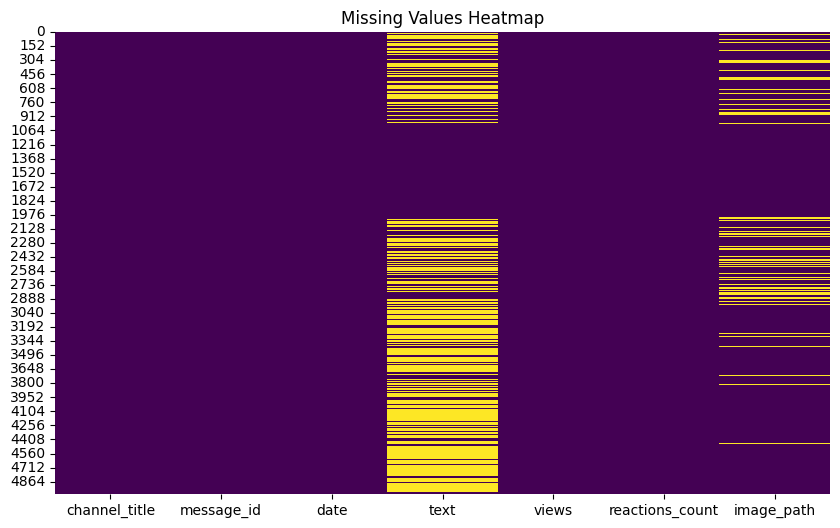

In [10]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_raw.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# Focus on 'text' column missingness, as it's crucial for NER
print(f"\nPercentage of missing 'text' entries: {df_raw['text'].isnull().sum() / len(df_raw) * 100:.2f}%")



Percentage of missing 'text' entries: 46.08%


In [19]:
# import to remove warnings from seaborn
import warnings
warnings.filterwarnings('ignore')


Messages per Channel:
channel_title
Zemen Express®    1000
EthioBrand®       1000
ልዩ እቃ             1000
Fashion tera      1000
ማራኪ ცЯﾑŋの™        1000
Name: count, dtype: int64


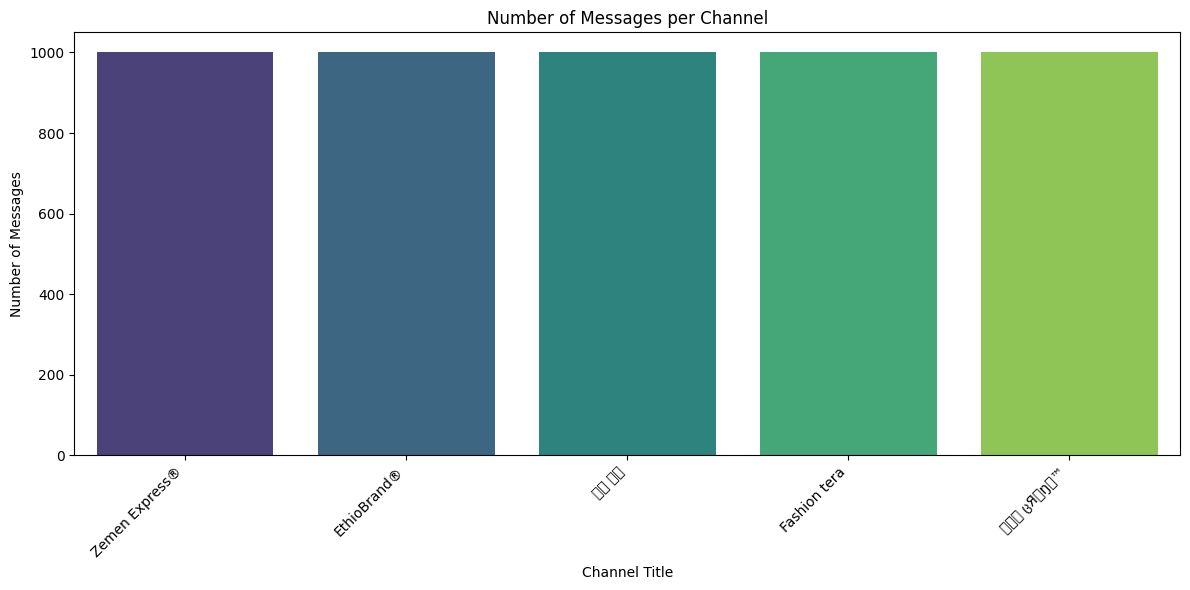

In [20]:
# 4.2 Distribution of messages per channel
print("\nMessages per Channel:")
messages_per_channel = df_raw['channel_title'].value_counts()
print(messages_per_channel)

plt.figure(figsize=(12, 6))
sns.barplot(x=messages_per_channel.index, y=messages_per_channel.values, palette='viridis')
plt.title('Number of Messages per Channel')
plt.xlabel('Channel Title')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Message Text Length Statistics:
count    5000.00000
mean      170.68440
std       200.67786
min         3.00000
25%         3.00000
50%       130.00000
75%       247.25000
max       985.00000
Name: text_length, dtype: float64


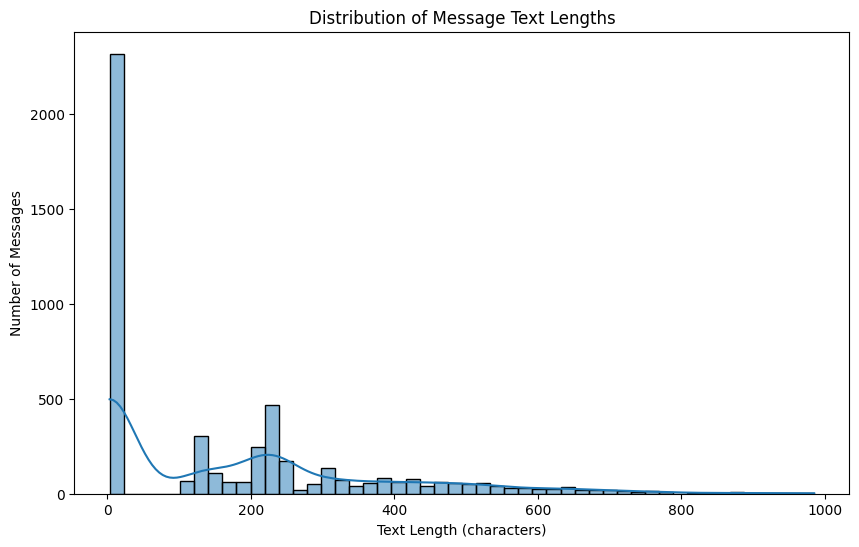


Example of shortest messages (length <= 10):
[nan, nan, nan, nan, nan]

Example of longest messages (top 5):
Message 644: 💥💥...................................💥💥

📌**Desktop Air Cooler Double Spray Air Conditioning Fan**


👍The portable design is small in size and can be easily carried out,
👍suitable for home, office, outdoor 

👍just press the switch to enjoy coolness, it is the best companion for your life.

👍Also a perfect gift 

⚠️Specification：

⚡️Material: ABS
⚡️Product size: 22*16*12.5cm/    8.7*6.3*5inches
⚡️Gross weight: 730g
⚡️Net weight: 575g
⚡️Capacity: 2.5L
⚡️Gear adjustment: 3 gear adjustment

⚠️Package includes:
⚡️1*Mist fan
⚡️1*Charging Cable


ዋጋ፦  💵🏷  2000ብር

♦️ውስን ፍሬ ነው ያለው 🔥🔥🔥

🏢 አድራሻ👉

📍ቁ.1️⃣♦️መገናኛ መሰረት ደፋር ሞል ሁለተኛ ፎቅ ቢሮ ቁ. S05/S06

📍 ቁ.2️⃣♦️ፒያሳ ጊዮርጊስ አደባባይ ራመት_ታቦር_ኦዳ_ህንፃ 1ኛ ፎቅ ሱቅ ቁ. G1 -107



     💧💧💧💧


    📲 0902660722
    📲 0928460606

➡️ 🔴ፒያሳ ቅርንጫፍ 0960460606
                            📱 @mardashope

🔖
💬በTelegram ለማዘዝ ⤵️ ይጠቀሙ🔽

@zemencallcenter 

@zemenexpre

In [22]:
# 4.3 Distribution of message length (character count)
if 'text' in df_raw.columns:
    df_raw['text_length'] = df_raw['text'].astype(str).apply(len)
    print("\nMessage Text Length Statistics:")
    print(df_raw['text_length'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df_raw['text_length'], bins=50, kde=True)
    plt.title('Distribution of Message Text Lengths')
    plt.xlabel('Text Length (characters)')
    plt.ylabel('Number of Messages')
    plt.show()

    # Identify messages with very short or very long text
    print(f"\nExample of shortest messages (length <= 10):")
    print(df_raw[df_raw['text_length'] <= 10]['text'].head(5).tolist())

    print(f"\nExample of longest messages (top 5):")
    for i, row in df_raw.sort_values(by='text_length', ascending=False).head(5).iterrows():
        print(f"Message {i}: {row['text']} (Length: {row['text_length']})")
    # print(df_raw.sort_values(by='text_length', ascending=False)['text'].head(5).tolist())


Distribution of Views:


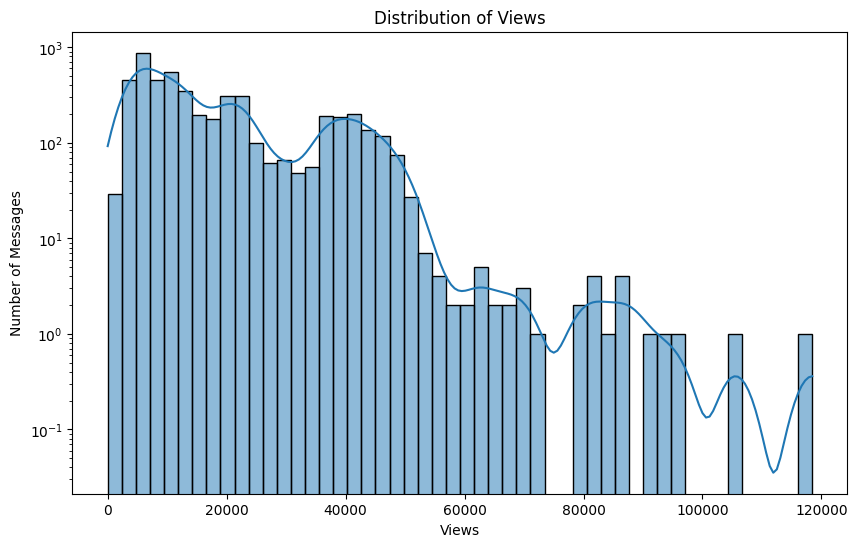

In [23]:
# 4.4 Distribution of views 
print("\nDistribution of Views:")
plt.figure(figsize=(10, 6))
sns.histplot(df_raw['views'], bins=50, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Number of Messages')
plt.yscale('log') # Use log scale as views can vary widely
plt.show()


Distribution of Reactions:


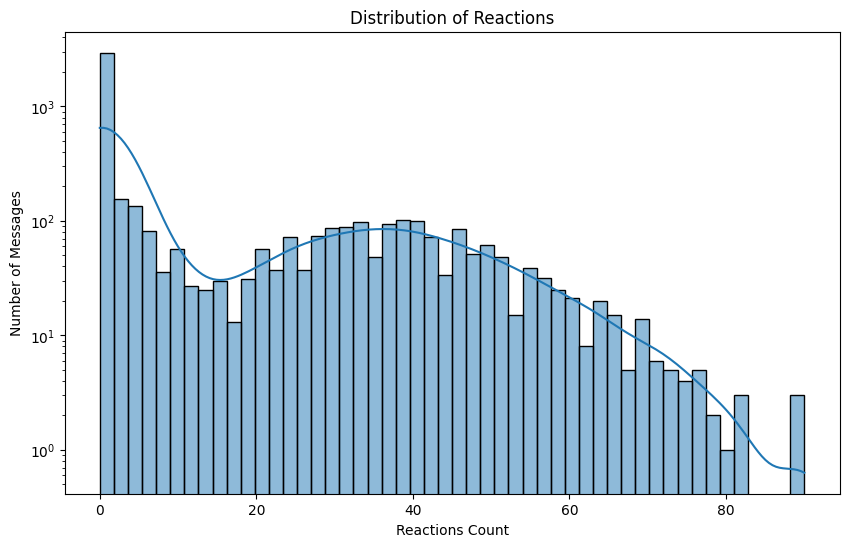

In [24]:
# 4.4 Distribution of reactions  
print("\nDistribution of Reactions:")
plt.figure(figsize=(10, 6)) 
sns.histplot(df_raw['reactions_count'], bins=50, kde=True)
plt.title('Distribution of Reactions')
plt.xlabel('Reactions Count')
plt.ylabel('Number of Messages')
plt.yscale('log') # Use log scale as reactions can vary widely
plt.show()

In [25]:

# 4.5 Inspect image_path
print("\nImage Paths Information:")
print(f"Number of messages with images: {df_raw['image_path'].notnull().sum()}")
print(f"Number of messages without images (NaN in image_path): {df_raw['image_path'].isnull().sum()}")


Image Paths Information:
Number of messages with images: 4418
Number of messages without images (NaN in image_path): 582


In [26]:
# Display some example image paths
print("\nSample Image Paths:")
print(df_raw[df_raw['image_path'].notnull()]['image_path'].head())


Sample Image Paths:
0    ../photos/ZemenExpress_6994.jpg
1    ../photos/ZemenExpress_6993.jpg
2    ../photos/ZemenExpress_6992.jpg
3    ../photos/ZemenExpress_6991.jpg
4    ../photos/ZemenExpress_6990.jpg
Name: image_path, dtype: object


In [30]:
import os

# Quick check if photo files actually exist (optional, can be time-consuming for many images)
# This assumes the notebook is run from EthioMart/notebooks/ and PHOTOS_DIR is ../photos
print("\nChecking existence of first 5 image files (might take a moment if many):")
for img_path_str in df_raw[df_raw['image_path'].notnull()]['image_path'].head():
    # Construct the actual photo path using os.path.join()
    actual_photo_path = os.path.join(project_root, 'photos', os.path.basename(img_path_str))
    print(f"Checking {actual_photo_path}: {'Exists' if os.path.exists(actual_photo_path) else 'Does NOT Exist'}")


Checking existence of first 5 image files (might take a moment if many):
Checking d:\@kaim\EthioMart\photos\ZemenExpress_6994.jpg: Exists
Checking d:\@kaim\EthioMart\photos\ZemenExpress_6993.jpg: Exists
Checking d:\@kaim\EthioMart\photos\ZemenExpress_6992.jpg: Exists
Checking d:\@kaim\EthioMart\photos\ZemenExpress_6991.jpg: Exists
Checking d:\@kaim\EthioMart\photos\ZemenExpress_6990.jpg: Exists


### --- Section 5: Initial Insights and Next Steps ---


In [31]:
print("\n--- Initial Insights and Next Steps ---")
print("Based on this EDA, we observe:")
print("\n1. Data Completeness:")
print(f"- Missing text in 46.08% of messages ({2304}/{5000}) - suggests heavy use of media-only posts")
print(f"- Images available for 88.36% of messages ({4418}/{5000})")
print("- No missing values in core metadata (channel, ID, date, views, reactions)")

print("\n2. Engagement Patterns:")
print("- Extreme view disparities: Mean=18,374 (Std=14,403), Max=118,454")
print("- 25% of messages have 0 reactions, while top 25% get 27+ reactions")
print("- Views distribution is right-skewed (few viral posts dominate)")

print("\n3. Content Characteristics:")
print("- Median text length=130 chars, but max=985 (long-form posts exist)")
print("- 50% of messages are under 130 chars (short announcements/common)")

print("\n4. Actionable Insights:")
print("- Media-rich channels: Prioritize image analysis for the 88% with photos")
print("- High-engagement threshold: Messages with 27+ reactions are top quartile")
print("- Text cleaning critical: 46% missing text implies need for OCR on images")

print("\nNext Steps:")
print("1. Preprocessing Pipeline:")
print("   - Clean/normalize Amharic text (handle missing values via image OCR)")
print("   - Extract hashtags/mentions from remaining text")
print("2. Feature Engineering:")
print("   - Create 'engagement_score' (views + 100*reactions)")
print("   - Add 'has_image' boolean flag")
print("3. Advanced Analysis:")
print("   - Cluster channels by post frequency/engagement patterns")
print("   - Detect viral content triggers (image+text combos)")
print("4. Model Preparation:")
print("   - Balance dataset for views/reactions prediction")
print("   - Fine-tune Amharic NER model on cleaned text")


--- Initial Insights and Next Steps ---
Based on this EDA, we observe:

1. Data Completeness:
- Missing text in 46.08% of messages (2304/5000) - suggests heavy use of media-only posts
- Images available for 88.36% of messages (4418/5000)
- No missing values in core metadata (channel, ID, date, views, reactions)

2. Engagement Patterns:
- Extreme view disparities: Mean=18,374 (Std=14,403), Max=118,454
- 25% of messages have 0 reactions, while top 25% get 27+ reactions
- Views distribution is right-skewed (few viral posts dominate)

3. Content Characteristics:
- Median text length=130 chars, but max=985 (long-form posts exist)
- 50% of messages are under 130 chars (short announcements/common)

4. Actionable Insights:
- Media-rich channels: Prioritize image analysis for the 88% with photos
- High-engagement threshold: Messages with 27+ reactions are top quartile
- Text cleaning critical: 46% missing text implies need for OCR on images

Next Steps:
1. Preprocessing Pipeline:
   - Clean/no